## Taller - Lectura ExtraCellar e Intracelular
* Abra el archivo IntraExtracelular.mat
* Aquí encuentra las variables variable1 y variable2. La primera corresponde a una matriz de 2 canales diferentes
(electrodos intracelular y extracelular, respectivamente) y 221077 muestras de tiempo. La segunda, es una
estructura con información del archivo, de donde puede extraer la frecuencia de muestreo Fs.
* Grafique en un figure las señales intracelular y extracelular (2 subplots). Utilice el vector de tiempo, títulos y
linkaxes.
* Para la señal intracelular, calcule un umbral estadístico y aplíquelo utilizando la función findpeaks() de Matlab
o Python. Revise la ayuda de esta función, para encontrar el parámetro que permite definir un valor umbral.
* La salida de findpeaks, corresponde a un vector con la localización de los picos (muestras). Con esta
información, cree un vector de ceros de la misma longitud de la señal (zeros ()) y asigne un 1 (o -1) en las
posiciones de localización de los picos.
* Sobreponga en color rojo, la localización de los picos sobre la señal intra. Para esto utilice la función hold on;
(para sobreponer sobre un plot otro plot).
* Para la señal extracelular, antes de detectar los picos, es necesario filtrar la señal. Para esto:
    - Calcule los coeficientes del filtro, por medio de la interfaz filterDesigner o pyfda. Compare diferentes
tipos de filtros y exporte los coeficientes al Workspace, para usarlos con la función respectiva.
    - Opcional: si desea calcular los coeficientes por medio de código, utilice el código de la diapo 16 con
frecuencias que considere adecuada. Use fvtool para ver la respuesta en frecuencia del filtro y compararlos.
    - Utilice la función filtfilt , que hace automáticamente la corrección del corrimiento de fase.
    - Una vez filtrada, encuentre el umbral estadístico y grafique la señal binaria sobrepuesta a la señal extra.
Nota: Diseñe una estrategia para tratar los picos de la señal extracelular, ya que son negativos.

In [1]:
# Made by Fredy E Mena Andrade
# %matplotlib widget

from pathlib import Path
from scipy import io as sci
from scipy import signal as sign
import pprint as pp
import matplotlib.pyplot as mpl
import numpy as np

mpl.ion()
# definiendo una ruta para encontrar el Dataset local
DATA = Path().resolve() / '../../data'
INTRAEXTRACEL = DATA / 'IntraExtracelular.mat'

#Cargando el dataset
mat_data = sci.loadmat(INTRAEXTRACEL)

# Cargar los datos de variable1 y variable2
va1 = mat_data["variable1"]
va2 = mat_data["variable2"]

# Cargando los campos existentes en variable2
info = va2['Info'][0, 0]  # Access 'Info' field
samples = va2['Samples'][0, 0]  # Access 'Samples' field
sampling_rate = va2['SamplingRateHz'][0, 0]  # Access 'SamplingRateHz' field
sampling_interval = va2['SamplingIntervalSec'][0, 0]  # Access 'SamplingIntervalSec' field
gain = va2['Gain'][0, 0]  # Access 'Gain' field
base = va2['Base'][0, 0]  # Access 'Base' field
units = va2['Units'][0, 0]  # Access 'Units' field
note = va2['Note'][0, 0]  # Access 'Note' field


#Lineas para observar estructura del dataset en la terminal.
pp.PrettyPrinter( indent = 4)
#pp.pprint(f"mat_data -> {mat_data}")
pp.pprint(f"var1 -> {va1}")
pp.pprint(f"var2 -> {va2}")

# Crear la variable de potenciales Intraceclulares, y aplicar un filtro pasa banda
va1_intraCel_row = ( va1[0, :] )
va1_extraCel_row = ( va1[1, :] )

# Crear la varaible de aplitud de los potenciales Intracelulares
intra_amplitude = np.max(va1_intraCel_row) - np.min(va1_intraCel_row)
extra_amplitude = np.max(va1_extraCel_row) - np.min(va1_extraCel_row)

# duracion de la señal en segundos:
total_duration =  samples[0][0] / sampling_rate
# Crear el vector de tiempo:
time_vec = np.linspace(0, total_duration, samples[0][0]).reshape(-1)

pp.pprint(f"Inter row1 -> {va1_intraCel_row}")
pp.pprint(f"Exter row1 -> {va1_extraCel_row}")
pp.pprint(f"Inter amplitude -> {intra_amplitude}")
pp.pprint(f"Exter amplitude -> {extra_amplitude}")
pp.pprint(f"Data Hz -> {sampling_rate}")



('var1 -> [[-53.44238281 -53.39355469 -53.39355469 ... -53.61328125 '
 '-53.44238281\n'
 '  -53.61328125]\n'
 ' [ 19.53125     19.07348633  18.00537109 ...   4.73022461   3.35693359\n'
 '    5.18798828]]')
("var2 -> [[(array(['intra5'], dtype='<U6'), array([[221077]], dtype=int32), "
 'array([[66666.66666667]]), array([[1.5e-05]]), array([[1]], dtype=uint8), '
 "array([[0]], dtype=uint8), array([[array(['mV'], dtype='<U2'), array(['uV'], "
 "dtype='<U2')]],\n"
 "        dtype=object), array(['To convert from raw units to the physical "
 "units shown above, subtract base and divide by gain.'],\n"
 '        '
 "dtype='<U94'))                                                                                                                                                                                                                   "
 ']]')
('Inter row1 -> [-53.44238281 -53.39355469 -53.39355469 ... -53.61328125 '
 '-53.44238281\n'
 ' -53.61328125]')
('Exter row1 -> [19.53125    19.07348

### Aplicando Filtros Pasabanda a Intracelular and Extracelular rows 

In [2]:
# Definimos Propiedades del filtro Pasabanda
low_cut = 300.0
hight_cut = 2700.0
nyquist = 0.5 * sampling_rate
# Creamos las bandas del filtro
low_band = low_cut / nyquist
hight_band = hight_cut / nyquist
order = 4

# el metodo butter nos permite diseñar el filtro que queremos,
# el parametro fs se usa solo si los umbrales del filtro no han sido normalizados
b, a = sign.butter( order, [low_band, hight_band], btype="bandpass")

# Aplicar el filtro a los datos Intracelulares
intra_filtered = sign.filtfilt( b, a, va1_intraCel_row )
# Aplicar el filtro a los datos Extracelulares
extra_filtered = sign.filtfilt( b, a, va1_extraCel_row ) * -1

pp.pprint( f"Intra Cel Filtered { intra_filtered }" )
pp.pprint( f"Extra Cel Filtered { extra_filtered } " )

('Intra Cel Filtered [ 3.72115024e+00  3.78655349e+00  3.84787783e+00 ...  '
 '4.43660194e-04\n'
 ' -6.49514991e-03 -1.23186367e-02]')
('Extra Cel Filtered [-2.55319166 -2.57527754 -2.60939001 ...  0.63860416  '
 '0.37498691\n'
 '  0.10896365] ')


### Graficando Potenciales
Procedo a preparar información importante para la gráfica:
* Calcular un umbral estadistico para los picos de Potenciales Intracelular


In [3]:
# Creo un factor k para el Umbral
k = 5

# Calculo la mediana de potenciales de activación intracelulares 
inter_median = np.median(intra_filtered)
inter_deviation = np.std(intra_filtered)
# Calculo el umbral superior e inferior de los Potenciales Intracel
intr_upper_threshold  = ( abs(inter_median + k * inter_deviation) )
intr_lower_threshold = ( inter_median - k * inter_deviation )
pp.pprint(f"Intr Upper Threshold -> {intr_upper_threshold}")
pp.pprint(f"Intr Lower Threshold -> {intr_lower_threshold}")


'Intr Upper Threshold -> 20.743366881455415'
'Intr Lower Threshold -> -20.745507076122593'


*  Calcular el umbral estadistico para los picos de Potenciales Extracelulares

In [4]:
# Calculo la mediana de potenciales de activación intracelulares 
ext_median = np.median(extra_filtered)
ext_deviation = np.std(extra_filtered)
# Calculo el umbral superior e inferior de los Potenciales Intracel
ext_upper_threshold  = ( abs(ext_median + k * ext_deviation) )
ext_lower_threshold = ( ext_median - k * ext_deviation )
pp.pprint( f"Ext Upper Threshold -> {ext_upper_threshold}" )
pp.pprint( f"Ext Lower Threshold -> {ext_lower_threshold}" )

'Ext Upper Threshold -> 23.584691212358674'
'Ext Lower Threshold -> -23.867867145568173'


* Encontrar los picos usando los umbrales Intracelulares

In [5]:
# Cómo funciona el humbral en find_peaks:
# 
low_peak_offset = 12
intr_peaks, tup1    = sign.find_peaks( intra_filtered, height=intr_upper_threshold-low_peak_offset )
ext_peaks, tup2     = sign.find_peaks( extra_filtered, height=ext_upper_threshold-low_peak_offset )

# Crear vector de Zeros que contendrá picos internos:
intr_zero_vector = np.zeros_like(intra_filtered, dtype=int)
# Crear vector de Zeros que contendrá picos externos:
ext_zero_vector = np.zeros_like(extra_filtered, dtype=int)

pp.pprint( f"Intra Celular Peaks: -> { str(len(intr_peaks)) }" )
pp.pprint( f"Extra Celular Peaks: -> { str(len(ext_peaks*-1)) }" )
#pp.pprint( f"Peaks: -> {intr_peaks}")
#pp.pprint( f"Zeros: -> {zero_vector[148]}")

'Intra Celular Peaks: -> 92'
'Extra Celular Peaks: -> 246'


* crear metodo que generará gráficas con el mismo diseño

In [6]:
#Graficando los datos de la row
def plotCelPotential(title:str, va_row_data:list, zero_vec:list, xlabel:str, ylabel:str, peaks:list):
    fig, ax = mpl.subplots(1, 1, figsize=(18, 4))
    ax.set_title(title)
    ax.plot(time_vec, va_row_data, label="Signal")
    ax.plot(time_vec[peaks], va_row_data[peaks], "x", label="Peaks", color="magenta")
    if ( zero_vec is not None ):
        zero_vec[peaks] = va_row_data[peaks]
        ax.plot(time_vec, zero_vec, label="zero", color="red")
    ax.set_xlabel(xlabel, 
            loc="center")
    ax.set_ylabel(ylabel, 
            loc="center")
    ax.grid(visible=True, which="both", axis="both" )
    ax.legend()
    mpl.tight_layout()
    mpl.show()

* Grafico canal de electrodos Intracelular

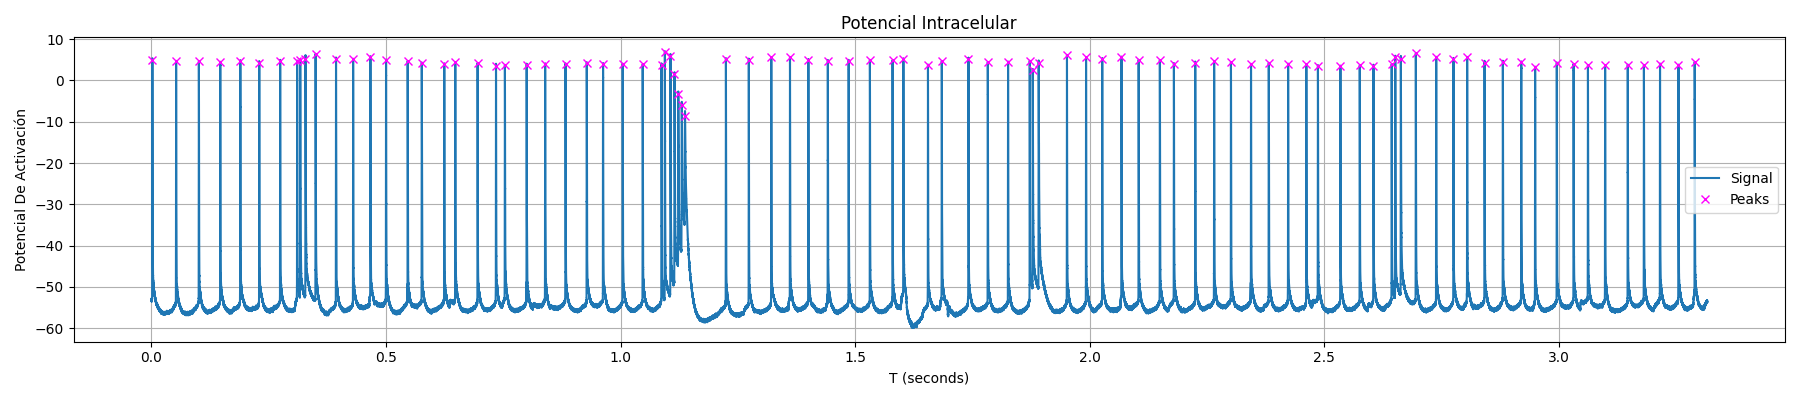

In [7]:

# Plot IntraCelular data without filtering: Esta gráfica original no era necesario filtrarla porque está entendible.
plotCelPotential("Potencial Intracelular", va1_intraCel_row, None, "T (seconds)", "Potencial De Activación", intr_peaks)
# Plot Intracelular after filtering:
# plotCelPotential("Potencial Intracelular", intra_filtered, "T (seconds)", "Potencial De Activación", intr_peaks)
#el potencial de membrana en reposo es de -60 mV

* Grafico canal de electrodos Extracelular

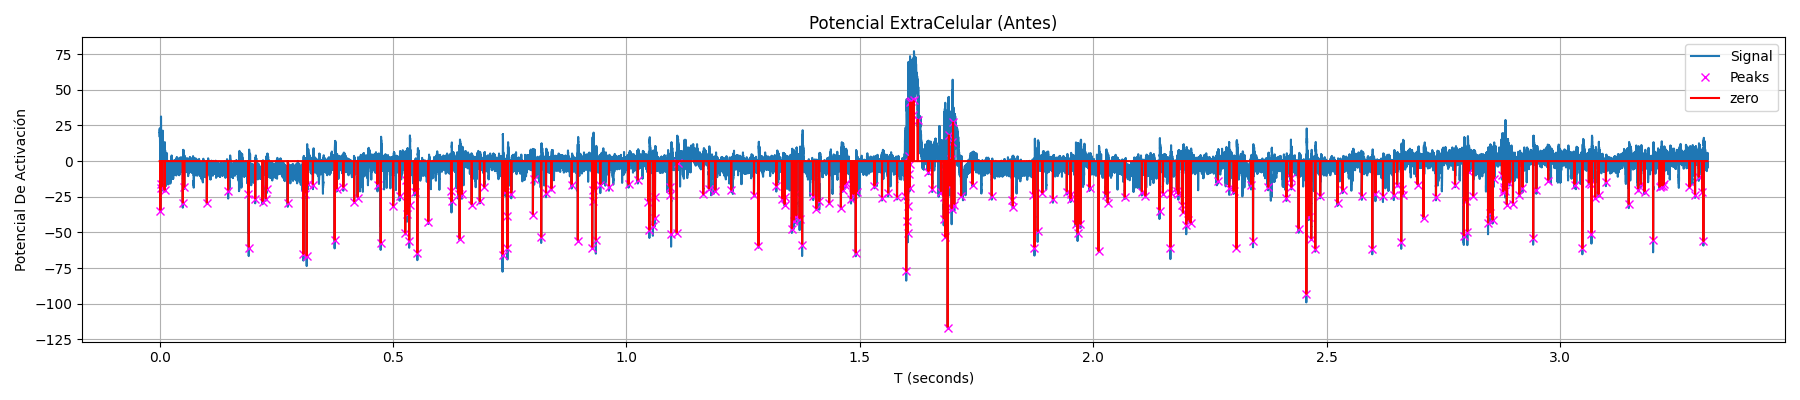

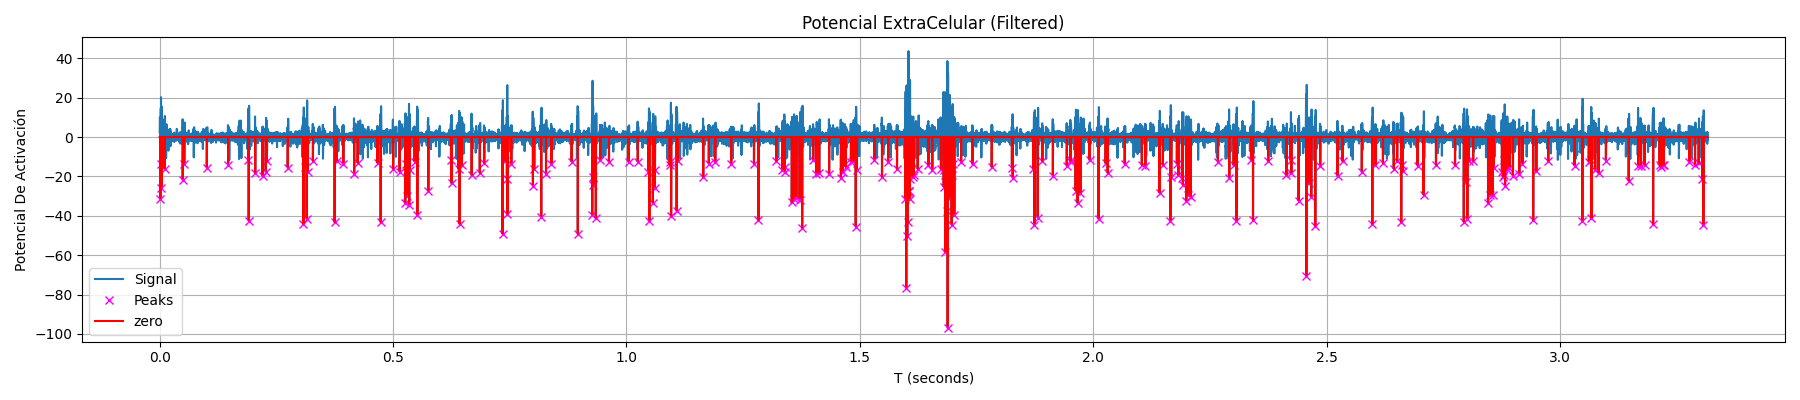

In [8]:
# Plot Extrernal Celular sin filtro:
plotCelPotential("Potencial ExtraCelular (Antes)", va1_extraCel_row, ext_zero_vector, "T (seconds)", "Potencial De Activación", ext_peaks)
# Regresamos el sentido de la señal a su estado original:
extra_filtered = extra_filtered * -1
# Plot External Celulalar con filtro pasabanda
plotCelPotential("Potencial ExtraCelular (Filtered)", extra_filtered, ext_zero_vector, "T (seconds)", "Potencial De Activación", ext_peaks)
# El Umbral estadistico no es de pico negativo y por esta razón el arreglo de los picos resultantes debe multiplicarse por -1

### Creando gráficos de dispersión y Kmeans 

In [9]:
#Graficando los datos de la row
def plotScatter(title:str, va_row_data:list, xlabel:str, ylabel:str, peaks:list):
    fig, ax = mpl.subplots(1, 1, figsize=(18, 4))
    ax.set_title(title)
    ax.scatter(time_vec[peaks], va_row_data[peaks], label="Peaks", color="magenta", marker="o")
    ax.set_xlabel(xlabel, 
            loc="center")
    ax.set_ylabel(ylabel, 
            loc="center")
    ax.grid(visible=True, which="both", axis="both" )
    ax.legend()
    mpl.tight_layout()
    mpl.show()

* Draw scatter plot for Intra Celular Data

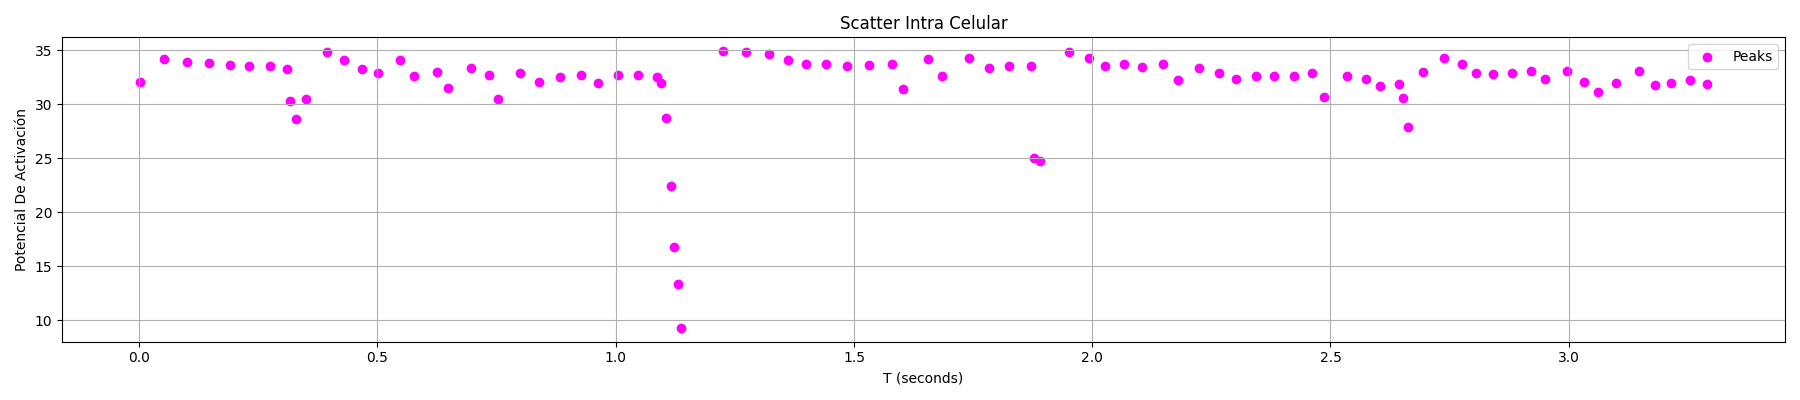

In [10]:
plotScatter("Scatter Intra Celular", intra_filtered, "T (seconds)", "Potencial De Activación", intr_peaks)

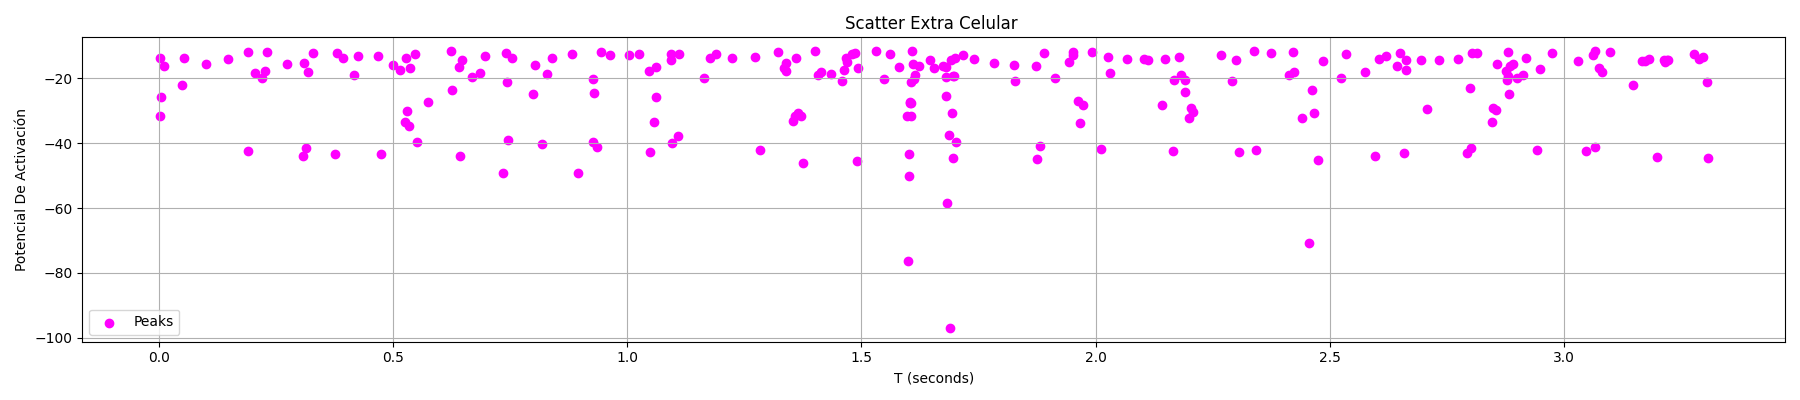

In [11]:
plotScatter("Scatter Extra Celular ", extra_filtered, "T (seconds)", "Potencial De Activación", ext_peaks)

### Construyendo Matrix de caracteristica
